# Ôn tập giữa kỳ


In [ ]:
# import library...
# ...

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [6]:
import pandas as pd

data = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')
doc = data.shape
hang, cot = doc
print(f"Du lieu co kich thuoc: {hang} hang, {cot} cot")



Du lieu co kich thuoc: 20000 hang, 9 cot


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [20]:
import pandas as pd
df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

print("#a. ti le nam nu")
tonggioitinh = df['gender'].value_counts()
nam = tonggioitinh['m'] / tonggioitinh.sum() * 100
nu = tonggioitinh['f'] / tonggioitinh.sum() * 100
print(f"Ti le gioi tinh nam: {nam:.2f}%")
print(f"Ti le gioi tinh nu: {nu:.2f}%")

print()
print("#b. Ti le nguoi co suc khoe kem")
nguoitap = df[df['exerany']==1] #nhung nguoi co tap the thao
nguoi_suc_khoe_kem = (nguoitap['genhlth']== 'poor').sum()/nguoitap.shape[0] *100 #nguoi danh gia co suc khoe kem
print(f"Ti le nhung nguoi tu danh gia co suc khoe kem: {nguoi_suc_khoe_kem:.2f}%")

#a. ti le nam nu
Ti le gioi tinh nam: 47.84%
Ti le gioi tinh nu: 52.15%

#b. Ti le nguoi co suc khoe kem
Ti le nhung nguoi tu danh gia co suc khoe kem: 1.96%


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [40]:
import pandas as pd
df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

print("#a. Doi don vi chieu cao tu inches sang centimet, doi can nang tu pound sang kg\n")
data['height_cm'] = data['height'] * 2.54 
data['weight_kg'] = data['weight'] * 0.453592  
print(data[['height', 'height_cm', 'weight', 'weight_kg']].head(8))

print()
print("#b. Ti le nhung nguoi muon giam can")

giamcan = (df['wtdesire'] < df['weight']).sum()
tongnguoi = data.shape[0]
tile_giamcan = (giamcan/tongnguoi) * 100
print(f"    Ti le nguoi muon giam can: {tile_giamcan:.2f}%")

#a. Doi don vi chieu cao tu inches sang centimet, doi can nang tu pound sang kg

   height  height_cm  weight  weight_kg
0      70     177.80     175  79.378600
1      64     162.56     125  56.699000
2      60     152.40     105  47.627160
3      66     167.64     132  59.874144
4      61     154.94     150  68.038800
5      64     162.56     114  51.709488
6      71     180.34     194  87.996848
7      67     170.18     170  77.110640

#b. Ti le nhung nguoi muon giam can
    Ti le nguoi muon giam can: 63.82%


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

Cau a: 


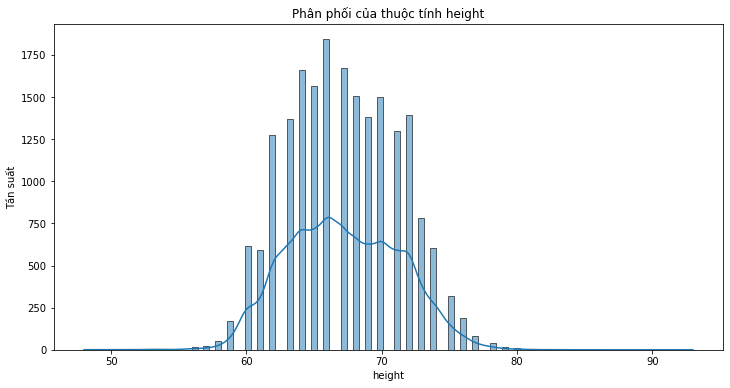

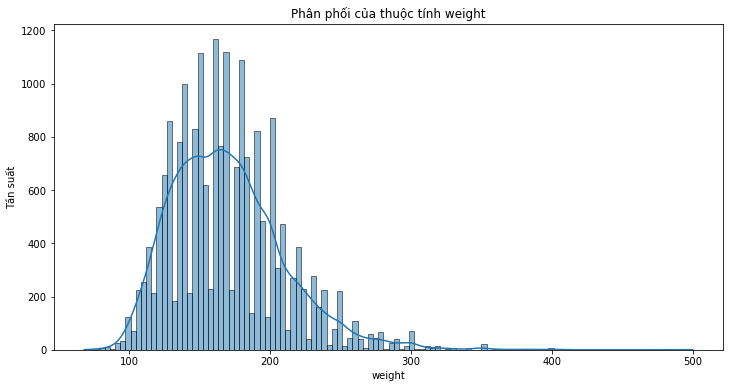

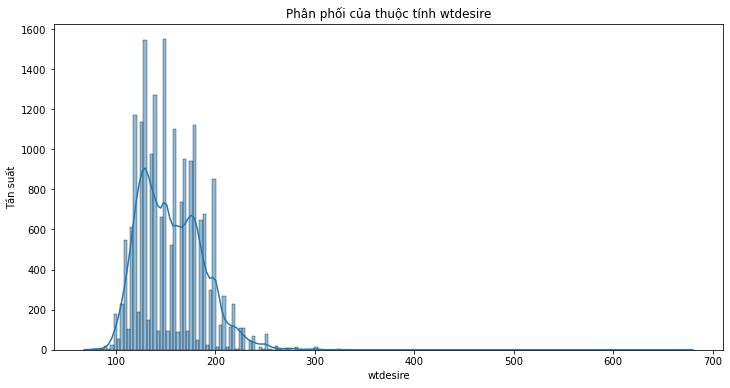

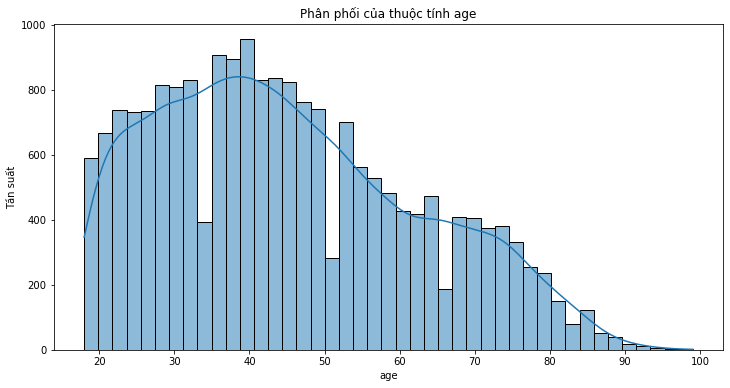


Cau b: 


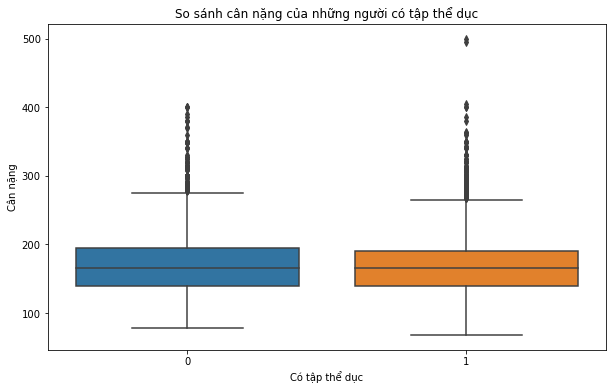

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

print("Cau a: ")
thuoctinh = ['height', 'weight', 'wtdesire', 'age']
for thuoctinhh in thuoctinh:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(data[thuoctinhh], kde=True, ax=ax)
    ax.set_title(f'Phân phối của thuộc tính {thuoctinhh}')
    ax.set_xlabel(thuoctinhh)
    ax.set_ylabel('Tần suất')
    plt.show()
    
print()
print("Cau b: ")
plt.figure(figsize=(10, 6))
sns.boxplot(x='exerany', y='weight', data=data)
plt.xlabel('Có tập thể dục')
plt.ylabel('Cân nặng')
plt.title('So sánh cân nặng của những người có tập thể dục')
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

age_mean = df['age'].mean()
age_std = df['age'].std()
age_25th = df['age'].quantile(0.25)
age_50th = df['age'].quantile(0.5)
age_75th = df['age'].quantile(0.75)

print(f'Tuổi trung bình: {age_mean:.2f}')
print(f'Độ lệch chuẩn: {age_std:.2f}')
print(f'Phân vị 25%: {age_25th:.2f}')
print(f'Phân vị 50%: {age_50th:.2f}')
print(f'Phân vị 75%: {age_75th:.2f}')

Tuổi trung bình: 45.07
Độ lệch chuẩn: 17.19
Phân vị 25%: 31.00
Phân vị 50%: 43.00
Phân vị 75%: 57.00


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



Ti le nguoi tham gia khao sat co hut thuoc: 47.21%

Smoking rate by age group:
 age
18     30.065359
19     38.869258
20     39.937107
21     44.000000
22     38.268156
         ...    
94      0.000000
95      0.000000
96    100.000000
97    100.000000
99     50.000000
Name: smoker, Length: 81, dtype: float64


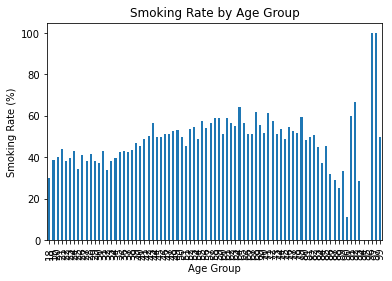

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')
# tile_hutthuoc = df['smoke100'].value_counts(normalize = True) *100
# print(f"Ti le nguoi hut thuoc: {tile_hutthuoc}")
data['smoker'] = data['smoke100'] > 0 
tile_smoke = data['smoker'].mean() * 100
print(f"Ti le nguoi tham gia khao sat co hut thuoc: {tile_smoke:.2f}%")

print()
smoking_rate_by_age = data.groupby('age')['smoker'].mean() * 100
print("Smoking rate by age group:\n", smoking_rate_by_age)
smoking_rate_by_age.plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Smoking Rate (%)")
plt.title("Smoking Rate by Age Group")
plt.show()

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [57]:
import pandas as pd
df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

data['height_m'] = data['height_cm']/100 
data['BMI'] = data['weight']/data['height_cm'] **2
tb_BMI_gioi_tinh = data.groupby('gender')['BMI'].mean()
print("Average BMI by gender:\n", tb_BMI_gioi_tinh)

Average BMI by gender:
 gender
f    0.005676
m    0.005936
Name: BMI, dtype: float64


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [61]:
import pandas as pd
df = pd.read_csv(r'T:\TKUD\data\brfss_2000.csv')

data['height_m'] = data['height_cm']/100 
data['BMI'] = data['weight']/data['height_cm'] **2
data['obese'] = data['BMI'] >= 30 
tile_beo_phi = data['obese'].mean() * 100
print(f"\nTi le beo phi: {tile_beo_phi:.2f}%")
theogioitinh = data.groupby('gender')['obese'].mean() * 100
print("\nTi le beo phi theo gioi tinh:\n", theogioitinh)
theotuoi = data.groupby('age')['obese'].mean() * 100
print("\nTi le beo phi theo tuoi:\n", theotuoi)


Ti le beo phi: 0.00%

Ti le beo phi theo gioi tinh:
 gender
f    0
m    0
Name: obese, dtype: int32

Ti le beo phi theo tuoi:
 age
18    0
19    0
20    0
21    0
22    0
     ..
94    0
95    0
96    0
97    0
99    0
Name: obese, Length: 81, dtype: int32


---